# Reinforcement learning 

# Basic overview

From [wiki](https://en.wikipedia.org/wiki/Reinforcement_learning): 

***Reinforcement learning (RL)** is an area of machine learning concerned with how intelligent agents ought to take actions in an environment in order to maximize the notion of cumulative reward.*

The 4 main components of any RL algorithm are therefore the following:

* `Agent` - an entity (computer program) that makes decisions. 

* `Action` - decision made by an agent. 

* `Environment` - an interface for the agents to interact with. The environment accepts actions and responds with the result and a new set of observations. 

* `Reward` - a function that assigns a value (reward) for each action that an agent can take. 

The interaction between the 4 components: 

![](media/chapter-1/reinforcement-learning-overview.png)

# How does the agent learn? 

The goal of RL is to make the agent make actions that maximize the rewards. The programmer (you) must define an environment and a reward generated function such that the agent learns with each iteration and "good" actions are rewarded while "bad" actions are penalized.

To put it mathematicaly, the reward function maps the set of all actions made in the environment and assigns a reward value. 

If we define 

$A$ - action set 

$f_{E}$ - environment function 

$R$ - reward set

Then the output that gets feeded to the agent is: 

$f_{E}: A \rightarrow R$

Or 

$f(a) = r$, $a \in A$, $r \in R$

Basicaly, an agent keeps a ledger in his internal memory that maps each action to a certain reward. After the reward is received, the internal state is updated. If we define the internal state at time $t$ as $w_{t}$, then the high level logic of an agent "learning" is: 

$$w_{t + 1} = w_{t} + \alpha f_{E}(a_{t}) $$

Where 

$\alpha$ - a positive constant; Learning rate.

$a_{t}$ - action taken at time $t$. 

$w_{t}$ - internal state at time $t$.

![](media/chapter-1/rl-learning.png)

After each action, the agent updates the internal state and then the cycle is repeated. 

# Actions and action value

Now lets put the values, actions and rewards to rigorous mathematical definitions. I will follow the notations layed out in the Richard S. Sutton and Andrew G. Barto's book: [Reinforcement Learning: An Introduction](http://incompleteideas.net/book/the-book-2nd.html).

An action $a$ out of a set of all possible actions $A$ is denoted as $a \in A$.

A timestep is denoted as $t$.

An action taken at time $t$ is denoted as $a_{t}$.

A reward at time $t$ is denoted as $R_{t}$.

The action-value function is denoted as $q_{*}(a) = \mathbb{E}[R_{t} | a_{t} = a]$. 

As in all math, a * notation means something beeing optimal. The estimate for the action-value function is denoted as $Q_{t}(a)$. We would like that in each step t, the estimate $Q_{t}(a)$ is as close as possible to the true action-value function $q_{*}(a)$.



## Examples in Python 

In [8]:
# Importing the randomness generating module
import numpy as np 

# Ploting 
import matplotlib.pyplot as plt

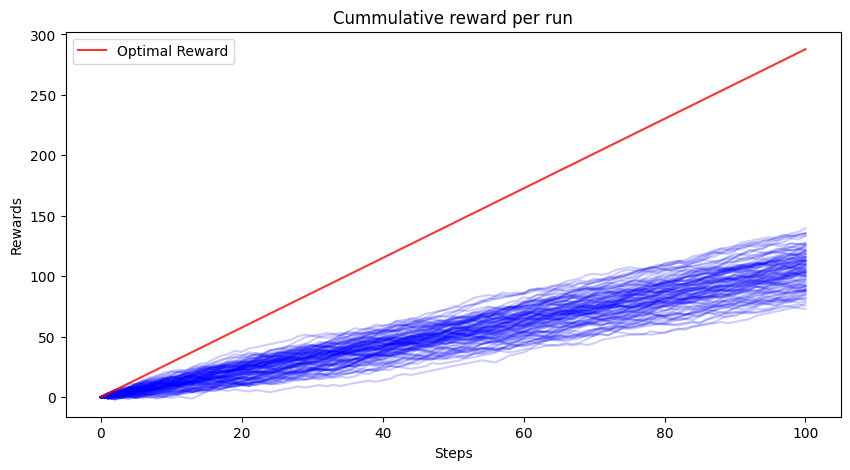

In [14]:
# Lets define an action set 
actions = ['up', 'down', 'left', 'right'] 

# Lets define a reward generating dictionary for each taken action 
rewards = {
    'up': np.random.normal(1, 0.5), 
    'down': np.random.normal(3, 1), 
    'left': np.random.normal(-1, 2), 
    'right': np.random.normal(2, 1)
    }

# Lets define the number of steps in each run our agent will take
steps = 100

# Lets define the number of runs our agent will take
runs = 100

# Defining an empty list to store the rewards for each run
rewards_per_run = []

# Running the simulation 
for run in range(runs):
    # Initiating the current reward to an empty list with the first element
    # as 0
    run_rewards = [0]
    optimal_rewards = [0]
    for i, step in enumerate(range(steps)):
        run_rewards.append(rewards[np.random.choice(actions)] + run_rewards[i])

    # Appending to the run reward
    rewards_per_run.append(run_rewards)

# Initiantin the optimal reward list 
optimal_rewards_per_run = [0]
for i, step in enumerate(range(steps)):
    optimal_rewards_per_run.append(rewards['down'] + optimal_rewards_per_run[i])


# Plotting the reward runs
fig, ax = plt.subplots(figsize=(10, 5))
for run in rewards_per_run:
    ax.plot(run, color='blue', alpha=0.2)

# Plotting the optimal reward
ax.plot(optimal_rewards_per_run, color='red', alpha=0.8, label='Optimal Reward')
ax.set_xlabel('Steps')
ax.set_ylabel('Rewards')
ax.set_title('Cummulative reward per run')
plt.legend()
plt.show()

The red line showcases the optimal reward if, at every step, our agent would have chosen the 'down' action. The blue lines showcase the reward that our agent has actually received.

One of the tasks for an RL agent is to automatically learn that the 'down' action is the best action to take.

This is what we will focus on in the next chapter. 